<a href="https://colab.research.google.com/github/InesAmri/AIHealth/blob/master/Kidney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Introduction

Accurate risk stratification in patients with chronic kidney disease (CKD) can help guide earlier, targeted treatment. 

The purpose of this study is to identify different types of risks related to CKD within our dataset supplied by UCI Machine Learning Repository. 


---



In [0]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# II. Data Preprocessing 

**Exploring the data**

In [0]:
# Import csv file 
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [0]:
data['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [0]:
# Descriptive statistics
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [0]:
# Inspecting categorical variables 
data['rbc'].unique()
data['pc'].unique()
data['pcc'].unique()
data['htn'].unique()
data['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [0]:
data['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [0]:
# Inspecting missing values 
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [0]:
np.unique(data['classification'],return_counts=True)

(array(['ckd', 'ckd\t', 'notckd'], dtype=object), array([248,   2, 150]))

**Preprocessing** **the** **data** 

In [0]:
# Data Labeling 
# Add the target label that signifies whether a patient has Chronic Kidney Disease (CKD) or not

data.loc[:,'classification']=np.where(data['classification']=='ckd',1,0)


In [0]:
# Converting nominal variables (yes/no) to binary 0/1
data[['htn','pe','ane']] = data[['htn','pe','ane']].replace(to_replace={'yes':1,'no':0})

In [0]:
# Converting nominal variables (normal/abnormal) to binary 
data[['rbc','pc']] = data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})


In [0]:
# Converting nominal variables (present/not present) to binary 
data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

In [0]:
data['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [0]:
# Converting nominal variables (good/poor) to binary 
data[['appet']] = data[['appet']].replace(to_replace={'good':1,'poor':0})

In [0]:
data['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [0]:
data[['cad']] = data[['cad']].replace(to_replace = {'yes':1,'no':0,'\tno':0})

In [0]:
data[['dm']] = data[['dm']].replace(to_replace = {'yes':1, 'no': 0, '\tno': 0, '\tyes': 1, ' yes':1 })

**Boxplot #1: Visualising the data**

---



An optimal blood pressure level is a reading under 120/80 mmHg

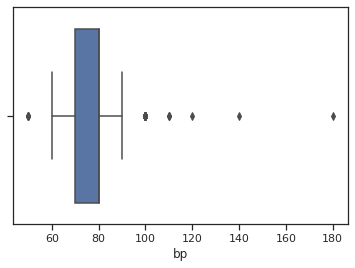

In [0]:
# look for outliers
# Blood Pressure
sns.boxplot(x=data['bp'])

Very high blood sugar above 400 mg/dL (22.2 mmol/L) can be a medical emergency.

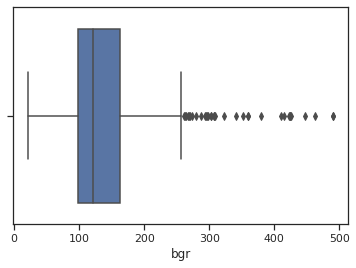

In [0]:
# Blood Glucose Random 
sns.boxplot(x=data['bgr'])

Blood urea around 7 to 20 mg/dl is considered normal

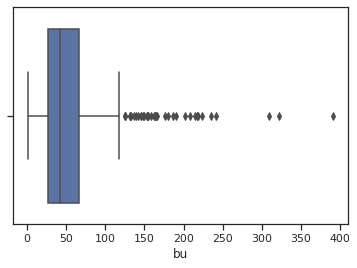

In [0]:
sns.boxplot(x=data['bu'])

Normal levels of creatinine in the blood are approximately 0.5 to 1.2 mg/dl

The kidneys are responsible for keeping the level of creatinine in the blood within a normal range. 

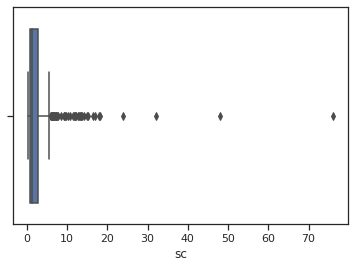

In [0]:
# Serum Creatinine 
sns.boxplot(x=data['sc'])

The normal potassium level in the blood is 3.5-5.0 milliEquivalents per liter (mEq/L). Levels above 7 mEq/L reflect severe hyperkalemia.

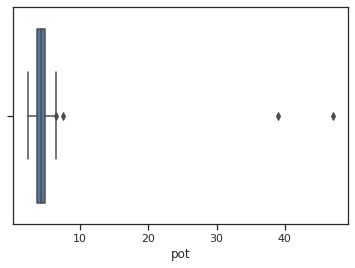

In [0]:
sns.boxplot(x=data['pot'])


A hemoglobin concentration of 15 g/dl appears optimal for preterm and full-term infants at birth as well as for adults.

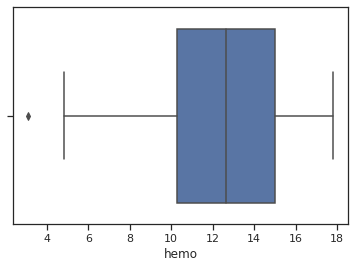

In [0]:
sns.boxplot(x=data['hemo'])

Several observation are related to young patients (below 15 years/old)

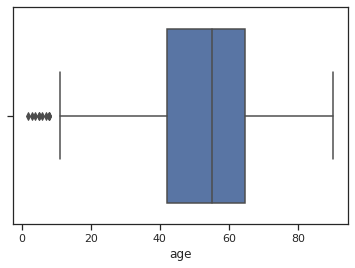

In [0]:
sns.boxplot(x=data['age'])

A normal blood sodium level is between 135 and 145 (mEq/L).

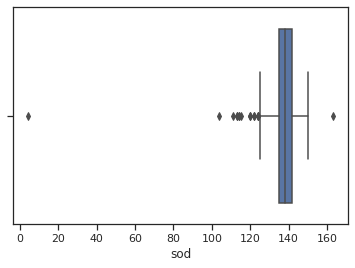

In [0]:
# Sodium
sns.boxplot(x=data['sod'])

In [0]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [0]:
# Save CSV 
from google.colab import files
data.to_csv('Kidney_disease_DH.csv')
files.download('Kidney_disease_DH.csv')

In [0]:
# Import csv file 
data = pd.read_csv('Kidney_disease_DH.csv')

**Handling Numerical Missing Values**

In [0]:
# Dealing with numerical missing values
data.columns
for col in ['age' ,'bp', 'bgr','bu', 'sc','sod', 'pot', 'hemo']:
  data[col].fillna((data[col].mean()),inplace=True)

In [0]:
# Looks like there some numerical variables (pcv, rb, wc) have some issues 
# as they are considered to be nominal 
# Let's clean these 3 columns

#pcv
data['pcv'].value_counts()
data[['pcv']] = data[['pcv']].replace(to_replace = {'\t?':0, '\t43': 43})
                                     
#wc
data['wc'].value_counts()
data[['wc']] = data[['wc']].replace(to_replace = {'\t8400':8400, '\t?':0})

#rc
data['rc'].value_counts()
data[['rc']] = data[['rc']].replace(to_replace = {'\t?':0})                            

In [0]:
# Making sure that all values are numeric 
data['rc']=data['rc'].astype(float) 
data['pcv']=data['pcv'].astype(float) 
data['wc']=data['wc'].astype(float) 

In [0]:
# Filling NaNs
for col in ['wc' ,'rc', 'pcv']:
  data[col].fillna((data[col].mean()),inplace=True)

In [0]:
# Replace 0 values with the mean
# for pcv
data.iloc[66, 17] = 38.76
# for wc
data.iloc[185, 18] = 8377.63
# for rc
data.iloc[162, 19] = 4.69

# to identify the rows: data[data[col] == 0]

**Boxplot #2: Visualising the data**

---



Normal white blood cells count range is usually between 4,000 and 11,000 per microliter of blood. A blood test that shows a WBC count of less than 4,000 per microliter  could mean your body may not be able to fight infection the way it should.

 White blood cell counts <1000 and >50,000 are considered critical values.

A marked elevation >18,000 to 20,000/mm3 suggests rupture, phlegmon, or abscess.

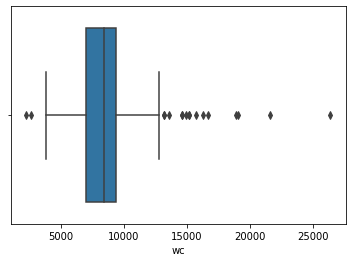

In [0]:
sns.boxplot(x=data['wc'])


Normal range varies slightly between laboratories but is generally between 4.2 - 5.9 million cells/cmm

A high RBC count may be a result of conditions that cause low oxygen levels in the blood.

A low RBC count indicates a decrease in oxygen-carrying cells in the blood.

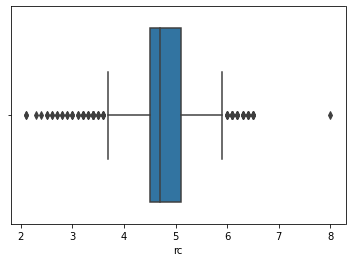

In [0]:
sns.boxplot(x=data['rc'])

The packed cell volume (PCV) is a measurement of the proportion of blood that is made up of cells. The value is expressed as a percentage or fraction of cells in blood. For example, a PCV of 40% means that there are 40 millilitres of cells in 100 millilitres of blood.

the normal mean packed cell volume range from 40 to 53 percent and 36 to 48 percent

The PCV rises when the number of red blood cells increases or when the total blood volume is reduced, as in dehydration. The PCV falls to less than normal, indicating anaemia, when your body decreases its production of red blood cells or increases its destruction of red blood cells.

When kidneys are diseased or damaged, they do not make enough a hormone called erythropoietin (EPO). As a result, the bone marrow makes fewer red blood cells, causing anemia. When blood has fewer red blood cells, it deprives the body of the oxygen it needs.

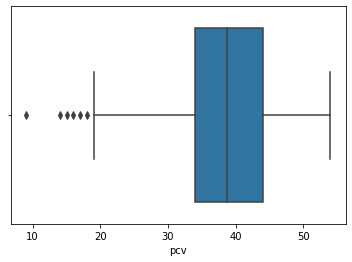

In [0]:
sns.boxplot(x=data['pcv'])

**Handling Categorical Missing Values**

In [0]:
# Dealing with categorical missing values
for col in ['sg' ,'al', 'su', 'rbc', 'pc', 'pcc','ba',
            'htn','dm', 'cad', 'appet', 'pe', 'ane'
        ]:
  data[col].fillna((data[col].value_counts().idxmax()),inplace=True)


In [0]:
# Converting them into categorical values
for col in ['sg' ,'al', 'su', 'rbc', 'pc', 'pcc','ba',
            'htn','dm', 'cad', 'appet', 'pe', 'ane', 'classification']:
  data[col]=data[col].astype(str) 

In [0]:
# Dropping index column
data = data.drop('Unnamed: 0',axis=1)

**Encoding Categorical Values**

In [0]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for label in ['sg' ,'al', 'su', 'rbc', 'pc', 'pcc','ba',
            'htn','dm', 'cad', 'appet', 'pe', 'ane', 'classification']:
  data[label]=labelencoder.fit_transform(data[label])

**Visualising the distribution of the data**

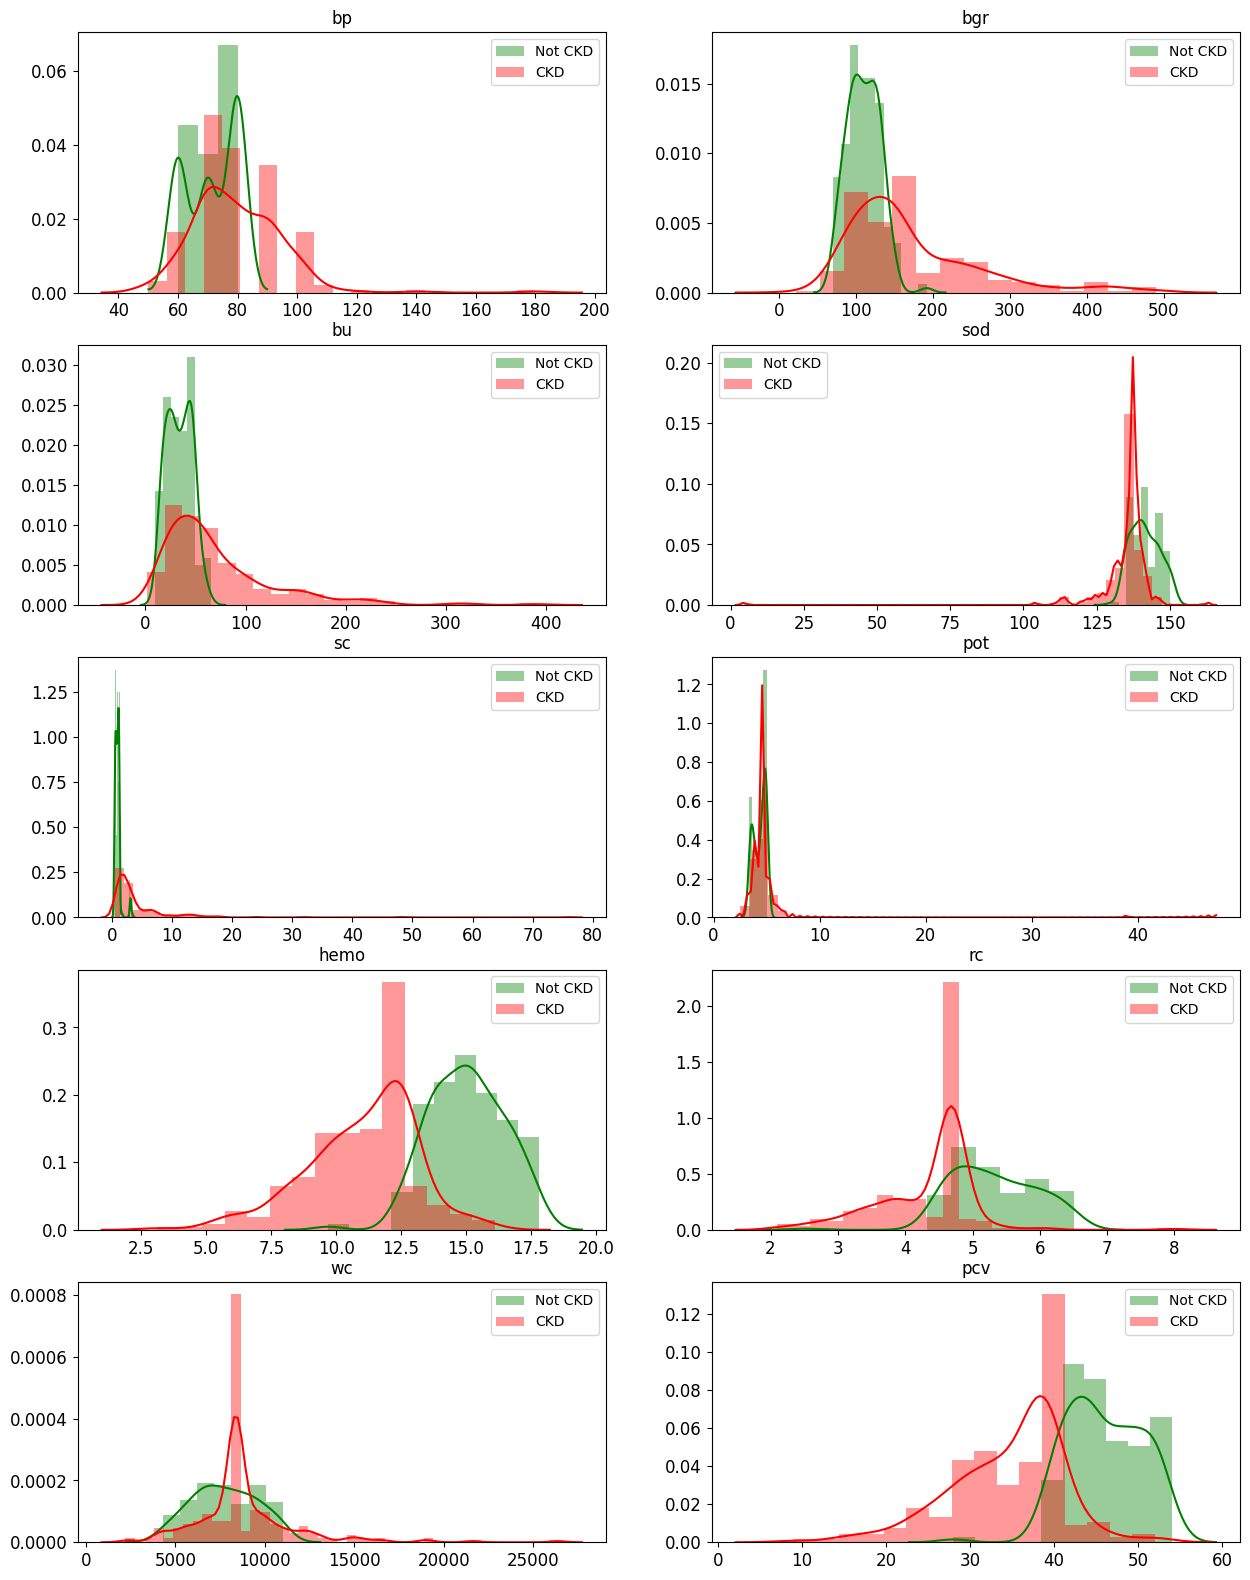

In [0]:
# Let's investigate the distribution 
FEATURES = ['bp', 'bgr','bu','sod','sc', 'pot', 'hemo','rc','wc','pcv']
CKD = data['classification'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(FEATURES)//2, figsize=(15, 20), dpi=100)

for i, feature in enumerate(FEATURES):
  row = i//2
  col = i%2
  sns.distplot(data.loc[~CKD][feature], label='Not CKD', ax=axes[row][col], color='green')
  sns.distplot(data.loc[CKD][feature], label='CKD', ax=axes[row][col], color='red')

  axes[row][col].set_xlabel('')
  axes[row][col].tick_params(axis='x', labelsize=12)
  axes[row][col].tick_params(axis='y', labelsize=12)
  axes[row][col].legend()
    
  axes[row][col].set_title(feature)
  axes[row][col].set_title(feature)

plt.show()

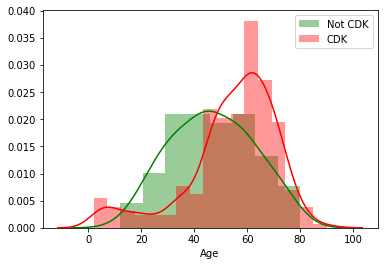

In [0]:
x1 = pd.Series(data.loc[~CKD]['age'], name="Age")
x2 = pd.Series(data.loc[CKD]['age'],name="Age")
ax = sns.distplot(x1, color='green', label='Not CDK')
ax = sns.distplot(x2, color='red',label='CDK')

# Add this line of code to show the legend labels
ax.legend()

label='CDK'

In [0]:
# Save CSV 
from google.colab import files
data.to_csv('Kidney_disease_DH_Clean.csv')
files.download('Kidney_disease_DH_Clean.csv')

# III. Data Analysis: Unsupervised Learning 

In [0]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import random

**Loading the dataset**

In [0]:
# Import csv file 
data = pd.read_csv('Kidney_disease_DH_Clean.csv')

In [0]:
# Cleaning the data 
data = data.rename(columns={'classification': 'CKD'})
data = data.drop('id',axis=1)
data = data.drop('Unnamed: 0',axis=1)
data = data.drop('Unnamed: 0.1',axis=1)
data = data.drop('Unnamed: 0.1.1',axis=1)
data

In [0]:
# Save CSV 
from google.colab import files
data.to_csv('CKD_Clean.csv')
files.download('CKD_Clean.csv')

In [0]:
# Import csv file 
data = pd.read_csv('CKD_Clean.csv')
data = data.drop('Unnamed: 0',axis=1)
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,CKD
0,48.0,80.0,3,1,0,0,0,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.20,1,1,0,1,0,0,1
1,7.0,50.0,3,4,0,0,0,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.69,0,0,0,1,0,0,1
2,62.0,80.0,1,2,3,0,0,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.69,0,1,0,0,0,1,1
3,48.0,70.0,0,4,0,0,1,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.90,1,0,0,0,1,1,1
4,51.0,80.0,1,2,0,0,0,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.60,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,0,0,0,0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.90,0,0,0,1,0,0,0
396,42.0,70.0,4,0,0,0,0,0,0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.20,0,0,0,1,0,0,0
397,12.0,80.0,3,0,0,0,0,0,0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.40,0,0,0,1,0,0,0
398,17.0,60.0,4,0,0,0,0,0,0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.90,0,0,0,1,0,0,0


**Standardising the data**

In [0]:
# standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled

array([[-0.20546364,  0.26233836,  0.4214856 , ..., -0.4843221 ,
        -0.42008403,  0.78288136],
       [-2.62380991, -1.96658024,  0.4214856 , ..., -0.4843221 ,
        -0.42008403,  0.78288136],
       [ 0.62031314,  0.26233836, -1.4210744 , ..., -0.4843221 ,
         2.38047614,  0.78288136],
       ...,
       [-2.32888964,  0.26233836,  0.4214856 , ..., -0.4843221 ,
        -0.42008403, -1.27733275],
       [-2.03396936, -1.22360737,  1.3427656 , ..., -0.4843221 ,
        -0.42008403, -1.27733275],
       [ 0.38437691,  0.26233836,  1.3427656 , ..., -0.4843221 ,
        -0.42008403, -1.27733275]])

**Perform PCA with 2 components**

In [0]:
# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(data_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(data_scaled)

**Finding the number of clusters K - The Elbow method**

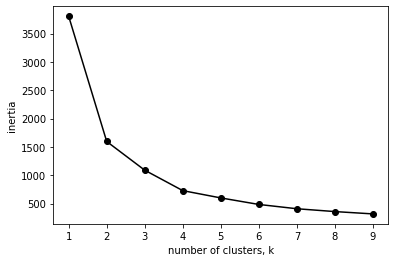

In [0]:
kls = range(1, 10)
# Inertia can be recognized as a measure of how internally coherent clusters are.
inertias = []
for k in kls:
    kmeans = KMeans(n_clusters=k)
    
    # Fit model to samples
    kmeans.fit(X_reduced[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
plt.plot(kls, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(kls)
plt.show()

**K-means Clustering**

In [0]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=6, n_init=10, random_state=10)

# Fit the data to the model
kmeans.fit(data_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(data_scaled)

In [0]:
# Add cluster number to the original data
data_scaled_clustered = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)
data_scaled_clustered['cluster'] = clusters

data_scaled_clustered.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,CKD,cluster
0,-0.205464,0.262338,0.421486,0.076249,-0.380269,-0.36489,-0.484322,-0.342518,-0.241249,-0.361987,-0.435268,-0.333743,0.000000,6.307513e-16,1.059271,0.630933,-0.237519,0.593677,1.311903,1.385535,-0.304789,0.507801,-0.484322,-0.420084,0.782881,4
1,-2.623810,-1.966580,0.421486,2.363728,-0.380269,-0.36489,-0.484322,-0.342518,-0.241249,0.000000,-0.800941,-0.405039,0.000000,6.307513e-16,-0.452097,-0.106076,-0.951778,-0.013970,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084,0.782881,3
2,0.620313,0.262338,-1.421074,0.838742,2.507853,-0.36489,-0.484322,-0.342518,-0.241249,3.681441,-0.089909,-0.226800,0.000000,6.307513e-16,-1.078762,-0.965920,-0.356562,-0.013970,-0.762252,1.385535,-0.304789,-1.969276,-0.484322,2.380476,0.782881,5
3,-0.205464,-0.480635,-2.342354,2.363728,-0.380269,-0.36489,2.064742,2.919556,-0.241249,-0.415543,-0.028964,0.129677,-2.885831,-7.553446e-01,-0.488960,-0.843085,-0.674011,-0.955227,1.311903,-0.721743,-0.304789,-1.969276,2.064742,2.380476,0.782881,0
4,-0.028511,0.262338,-1.421074,0.838742,-0.380269,-0.36489,-0.484322,-0.342518,-0.241249,-0.562820,-0.638420,-0.298096,0.000000,6.307513e-16,-0.341509,-0.474581,-0.435924,-0.121202,-0.762252,-0.721743,-0.304789,0.507801,-0.484322,-0.420084,0.782881,3


In [0]:
# Apply PCA transformation to the centroid
centres_reduced = pca.transform(kmeans.cluster_centers_)

**Plotting the clusters**

The function "display_factorial_planes" is provided by OpenClassroom. Go to section IV. Appendix and run the code under "Functions from OpenClassroom for cluster visualisation" before proceeding.

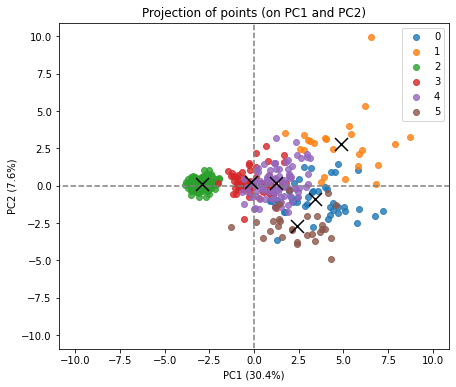

In [0]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.show()

**Interpreting the clusters**

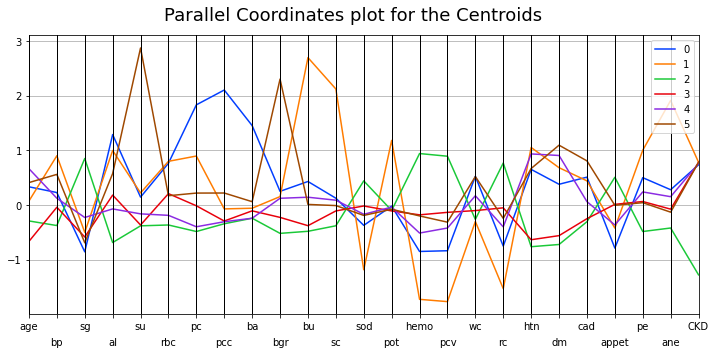

In [0]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

**Investigating variable of importance**

In [0]:
dataSD = data_scaled_clustered.copy()
dataSD = dataSD.drop('cluster', axis =1)

In [0]:
from sklearn.inspection import permutation_importance
perm_test = permutation_importance(kmeans,dataSD, None, n_repeats=10,
                                random_state=42, n_jobs=2)

In [0]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'pink') \
       .set_title(title, fontsize = 20)

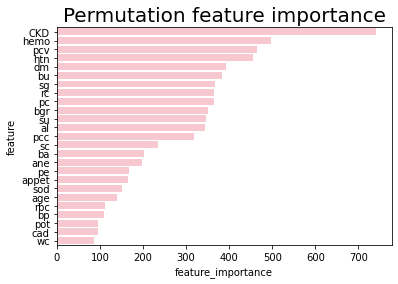

In [0]:
perm_test_imp = imp_df(dataSD.columns, perm_test.importances_mean)
var_imp_plot(perm_test_imp, 'Permutation feature importance')

**Repreating the analysis after filtering the outliers**

In [0]:
from scipy import stats
z = np.abs(stats.zscore(dataSD))
threshold = 3
DF = dataSD[(z < 3).all(axis=1)]
DF.shape

(313, 25)

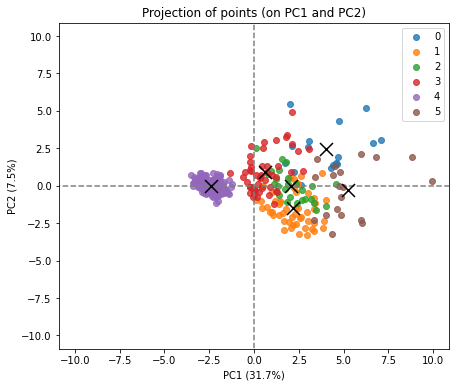

In [0]:
# standardizing the data
scaler_R = StandardScaler()
data_scaled_R = scaler.fit_transform(DF)

# Create a k-means clustering model
kmeans_R = KMeans(init='random', n_clusters=6, n_init=10, random_state=0)

# Fit the data to the model
kmeans_R.fit(data_scaled_R)

# Determine which clusters each data point belongs to:
clusters_R =  kmeans_R.predict(data_scaled_R)

# Add cluster number to the original data
data_scaled_clustered_R = pd.DataFrame(data_scaled_R, columns=DF.columns, index=DF.index)
data_scaled_clustered_R['cluster'] = clusters_R


# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca_R = PCA(n_components=2)
pca_R.fit(data_scaled_R)

# Transfor the scaled data to the new PCA space
data_reduced_R = pca_R.transform(data_scaled_R)
centres_reduced_R = pca_R.transform(kmeans_R.cluster_centers_)

display_factorial_planes(data_reduced_R, 2, pca_R, [(0,1)], illustrative_var = clusters_R, alpha = 0.8)
plt.scatter(centres_reduced_R[:, 0], centres_reduced_R[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.show()

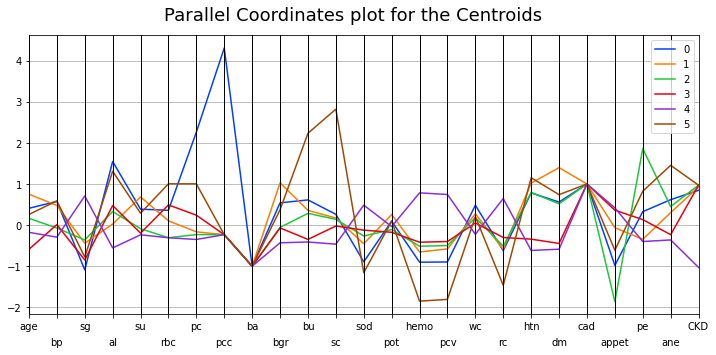

In [0]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=DF.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

# IV. Data Analysis: Supervised Learning 

**Clusters labeling**

---

 Cluster 0 : High risk - patients with Urinary Tract Infection (UTI) (Kidney Infection type)

Cluster 1 :  High risk - Advanced Stage of CKD

Cluster 2 : Low risk - Healthy patient (No condition)

Cluster 3 : Moderate risk - Early stage of CKD (Not Diabetic)

Cluster 4 : Moderate risk - Early stage of CKD for Diabetic patients 

Cluster 5 : High risk - Mid-stage CKD for Diabetic patients

# V. Appendix

**Functions from OpenClassroom for cluster visualisation**

---



In [0]:
# Code from Open Classroom for data visualisation
# https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/functions.py

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns


palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20) 

**Eliminating Outliers**

---




In [0]:
data.shape

(400, 26)

**Interquartile Range (IQR) Method**

In [0]:
# Calculating IQR score
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [0]:
df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(151, 26)

**Z-score Method**

In [0]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[1.72772608 0.20546364 0.26233836 ... 0.4843221  0.42008403 0.78288136]
 [1.7190658  2.62380991 1.96658024 ... 0.4843221  0.42008403 0.78288136]
 [1.71040552 0.62031314 0.26233836 ... 0.4843221  2.38047614 0.78288136]
 ...
 [1.71040552 2.32888964 0.26233836 ... 0.4843221  0.42008403 1.27733275]
 [1.7190658  2.03396936 1.22360737 ... 0.4843221  0.42008403 1.27733275]
 [1.72772608 0.38437691 0.26233836 ... 0.4843221  0.42008403 1.27733275]]


 The first array contains the list of row numbers and second array respective column numbers, which mean row 2 column 10 have a Z-score higher than 3.

In [0]:
threshold = 3
print(np.where(z > 3))

(array([  2,   6,   6,   7,   7,  10,  10,  11,  12,  13,  14,  14,  18,
        19,  20,  21,  21,  21,  24,  27,  27,  29,  34,  48,  49,  53,
        54,  56,  56,  57,  58,  61,  61,  61,  67,  69,  70,  73,  76,
        84,  86,  90,  90,  92,  92,  93,  96,  98,  99,  99, 101, 103,
       107, 111, 120, 122, 123, 128, 130, 130, 130, 133, 139, 140, 143,
       145, 145, 145, 145, 148, 153, 155, 156, 158, 158, 160, 168, 170,
       170, 176, 180, 181, 184, 189, 190, 190, 193, 195, 195, 198, 199,
       201, 210, 211, 212, 213, 225, 225, 225, 226, 231, 233, 235, 236,
       238, 242, 242, 244, 245, 246, 246, 248, 248, 249, 249, 249, 249]), array([10, 12, 13,  5, 10,  5, 10, 10, 21, 21,  9, 21, 21, 21, 21, 12, 13,
       21,  9,  5, 21, 21,  9, 17, 17,  5, 21,  5, 21, 21, 21, 11, 12, 14,
       10,  5,  5, 16,  9, 18, 10,  9, 21,  9, 21, 21, 21,  2,  2,  5,  9,
       11,  5, 21, 21, 11,  9, 14,  9, 11, 17, 18,  9,  5,  5,  4,  9, 11,
       21, 12, 11,  9,  9, 10, 21, 21,  5,  5, 10

In [0]:
df_out = data[(z < 3).all(axis=1)]
df_out.shape

(313, 26)

With the IQR with lose 62.25% of the data, while with the z-score with lose 21.75% 

outliers = patient having the disease --> We are interested in disease subtypes, therefore we need to study the outliers